In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from ta import add_all_ta_features
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import mplfinance as mpf
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import statsmodels.api as sm

In [2]:
!pip install ta


[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install mplfinance


[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df1 = pd.read_csv('google-stock-dataset-Daily.csv')
df1.head()

Unnamed: 0        Date  Price   High    Low  Close     Volume  Adj Close
0           0  2013-04-15  19.67  19.94  19.44  19.57   98025876      19.57
1           1  2013-04-16  19.68  19.92  19.62  19.85   69610320      19.85
2           2  2013-04-17  19.69  19.79  19.47  19.58   81398520      19.58
3           3  2013-04-18  19.65  19.66  19.05  19.17  132767100      19.17
4           4  2013-04-19  19.25  20.11  19.18  20.02  231895872      20.02

In [5]:
df2 = pd.read_csv('google-stock-dataset-Monthly.csv')
df2.head()

Unnamed: 0        Date  Price   High    Low  Close      Volume  Adj Close
0           0  2013-05-01  20.60  23.04  20.43  21.80  1974715308      21.80
1           1  2013-06-01  21.85  22.79  21.20  22.03  1941280776      22.03
2           2  2013-07-01  22.18  23.22  21.91  22.22  2047770180      22.22
3           3  2013-08-01  22.40  22.77  21.16  21.19  1338144516      21.19
4           4  2013-09-01  21.38  22.67  21.37  21.92  1323615060      21.92

In [6]:
df3 = pd.read_csv('google-stock-dataset-Weekly.csv')
df3.head()

Unnamed: 0        Date  Price   High    Low  Close     Volume  Adj Close
0           0  2013-04-15  19.67  20.11  19.05  20.02  613697688      20.02
1           1  2013-04-22  20.04  20.47  19.39  20.06  458928612      20.06
2           2  2013-04-29  20.10  21.19  20.10  21.16  423312264      21.16
3           3  2013-05-06  21.23  22.04  21.23  22.03  426249324      22.03
4           4  2013-05-13  21.99  23.02  21.86  22.75  520091388      22.75

In [7]:
#Merging all 3 datasets

# Read the tables from their respective files
df1 = pd.read_csv("google-stock-dataset-Daily.csv")
df2 = pd.read_csv("google-stock-dataset-Monthly.csv")
df3 = pd.read_csv("google-stock-dataset-Weekly.csv")

# Merge the tables based on the "Date" column
df = pd.concat([df1,df2,df3], ignore_index=True, sort=False)

# Drop the "Unnamed: 0" column
df = df.drop("Unnamed: 0", axis=1)

# Print the merged table without the "Unnamed: 0" column
print(df.head())

         Date  Price   High    Low  Close     Volume  Adj Close
0  2013-04-15  19.67  19.94  19.44  19.57   98025876      19.57
1  2013-04-16  19.68  19.92  19.62  19.85   69610320      19.85
2  2013-04-17  19.69  19.79  19.47  19.58   81398520      19.58
3  2013-04-18  19.65  19.66  19.05  19.17  132767100      19.17
4  2013-04-19  19.25  20.11  19.18  20.02  231895872      20.02


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3150 non-null   object 
 1   Price      3150 non-null   float64
 2   High       3150 non-null   float64
 3   Low        3150 non-null   float64
 4   Close      3150 non-null   float64
 5   Volume     3150 non-null   int64  
 6   Adj Close  3150 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 172.4+ KB


In [9]:
# Describes the following aspects of the data: Type of the data (integer, float, Python object, etc.)
df.dtypes

Date          object
Price        float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [10]:
# Finding the shape of the data
df.shape

(3150, 7)

In [11]:
#Length of Data
len(df)

3150

In [12]:
threshold = len(df)*0.05
threshold

157.5

In [13]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

Date         0
Price        0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64
0


In [14]:
# Finding Unique values
df.nunique()

Date         2601
Price        2082
High         2065
Low          2066
Close        2059
Volume       3054
Adj Close    2059
dtype: int64

In [15]:
# description of the data in the DataFrame.
df.describe().T

count          mean           std         min           25%  \
Price      3150.0  6.149753e+01  3.444623e+01       19.25  3.438500e+01   
High       3150.0  6.244241e+01  3.505886e+01       19.66  3.491750e+01   
Low        3150.0  6.060426e+01  3.383980e+01       19.05  3.379500e+01   
Close      3150.0  6.156946e+01  3.445728e+01       19.17  3.448000e+01   
Volume     3150.0  9.855214e+07  1.819388e+08  9312000.00  2.858350e+07   
Adj Close  3150.0  6.156946e+01  3.445728e+01       19.17  3.448000e+01   

                    50%           75%           max  
Price      5.324500e+01  7.856500e+01  1.512500e+02  
High       5.413000e+01  7.955250e+01  1.515500e+02  
Low        5.239500e+01  7.690000e+01  1.489000e+02  
Close      5.342000e+01  7.868250e+01  1.498400e+02  
Volume     3.908700e+07  8.358774e+07  2.206771e+09  
Adj Close  5.342000e+01  7.868250e+01  1.498400e+02

In [16]:
df.corr()

Price      High       Low     Close    Volume  Adj Close
Price      1.000000  0.999163  0.999173  0.998674 -0.095063   0.998674
High       0.999163  1.000000  0.998264  0.999167 -0.076648   0.999167
Low        0.999173  0.998264  1.000000  0.999120 -0.111604   0.999120
Close      0.998674  0.999167  0.999120  1.000000 -0.092826   1.000000
Volume    -0.095063 -0.076648 -0.111604 -0.092826  1.000000  -0.092826
Adj Close  0.998674  0.999167  0.999120  1.000000 -0.092826   1.000000

<AxesSubplot:>

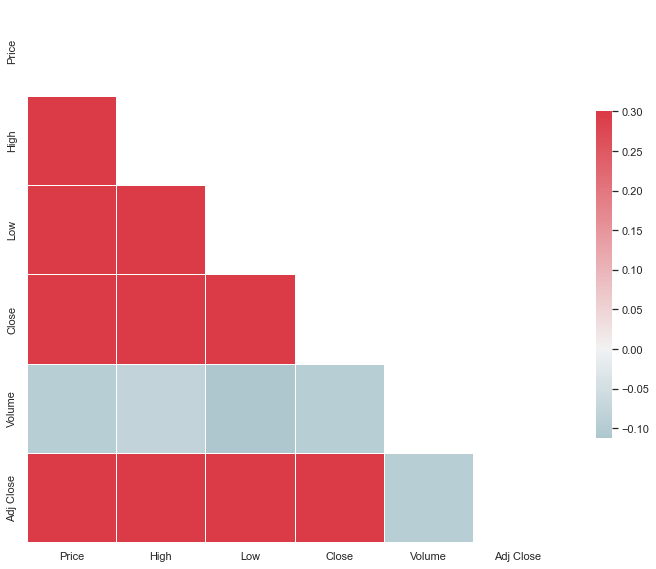

In [17]:
#Correlation
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
#Finding categorical columns in dataset
df.select_dtypes(include='object').columns

Index(['Date'], dtype='object')

In [19]:
#Finding numerical columns in dataset
num_col = df.select_dtypes(exclude='object').columns
num_col

Index(['Price', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

# Explanatory Data Analysis

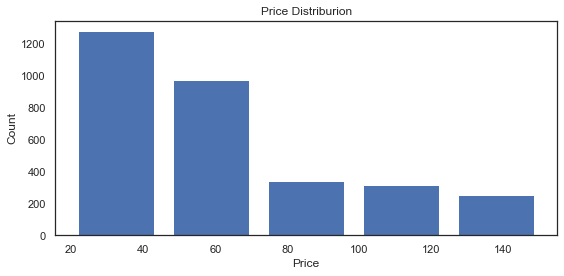

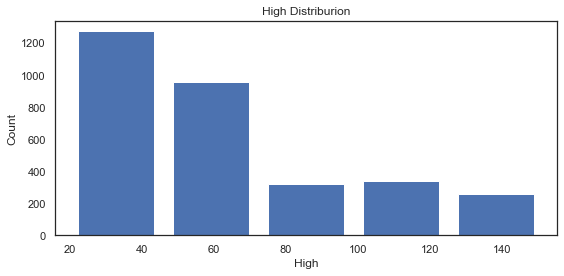

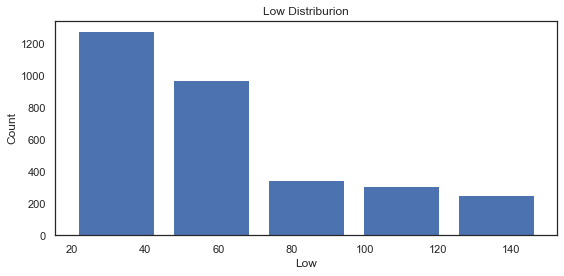

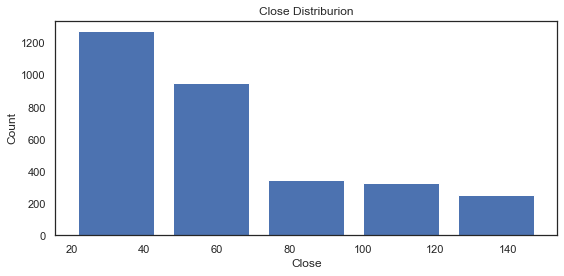

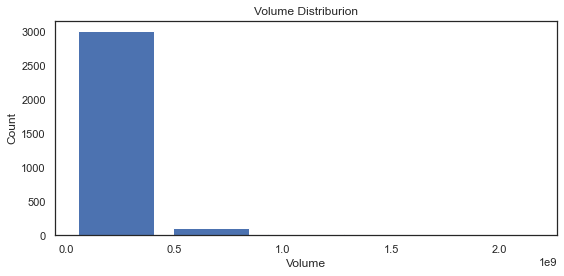

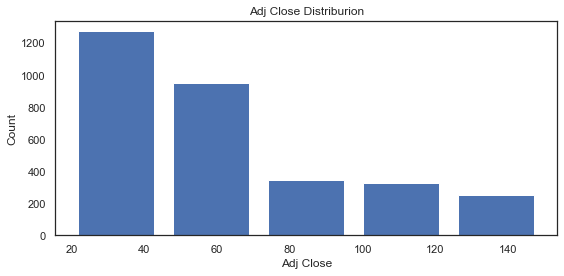

In [20]:
#Plot Numbers
num_col = df.select_dtypes(exclude='object').columns
for i, column in enumerate(num_col):
    plt.figure(figsize=(8,4))
    plt.hist(df[column],bins=5, rwidth=0.8)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('{} Distriburion'.format(column))
    plt.tight_layout()
    plt.show()

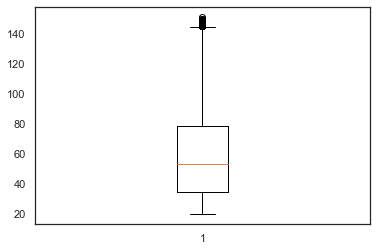

In [21]:
# Check for outliers
plt.boxplot(df['Price'])
plt.show()

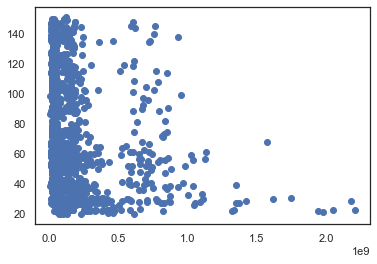

In [22]:
# Explore relationships between variables
plt.scatter(df['Volume'], df['Price'])
plt.show()

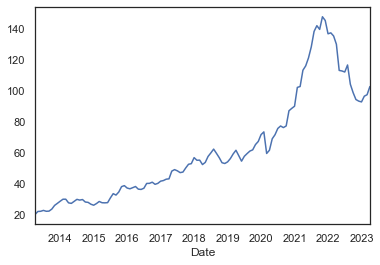

In [23]:
# Step 7: Check for trends over time
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.resample('M').mean()['Price'].plot()
plt.show()

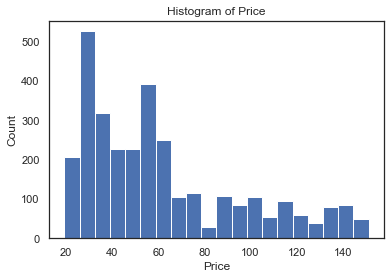

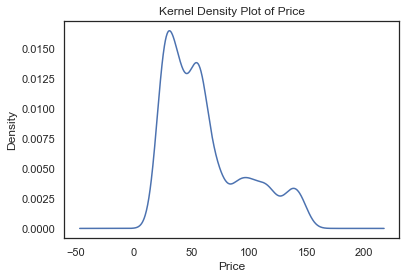

In [24]:
# Create a histogram of Price
plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Price')
plt.show()

# Create a kernel density plot of Price
df['Price'].plot(kind='density')
plt.xlabel('Price')
plt.title('Kernel Density Plot of Price')
plt.show()

In [25]:
# Compute Pearson's correlation coefficient matrix
corr_matrix = df.corr(method='pearson')

# Print the correlation matrix
print(corr_matrix)

              Price      High       Low     Close    Volume  Adj Close
Price      1.000000  0.999163  0.999173  0.998674 -0.095063   0.998674
High       0.999163  1.000000  0.998264  0.999167 -0.076648   0.999167
Low        0.999173  0.998264  1.000000  0.999120 -0.111604   0.999120
Close      0.998674  0.999167  0.999120  1.000000 -0.092826   1.000000
Volume    -0.095063 -0.076648 -0.111604 -0.092826  1.000000  -0.092826
Adj Close  0.998674  0.999167  0.999120  1.000000 -0.092826   1.000000


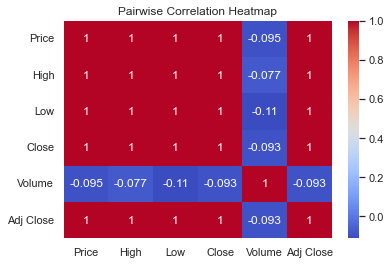

In [26]:
# Compute Pearson's correlation coefficient matrix
corr_matrix = df.corr(method='pearson')

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Pairwise Correlation Heatmap')
plt.show()

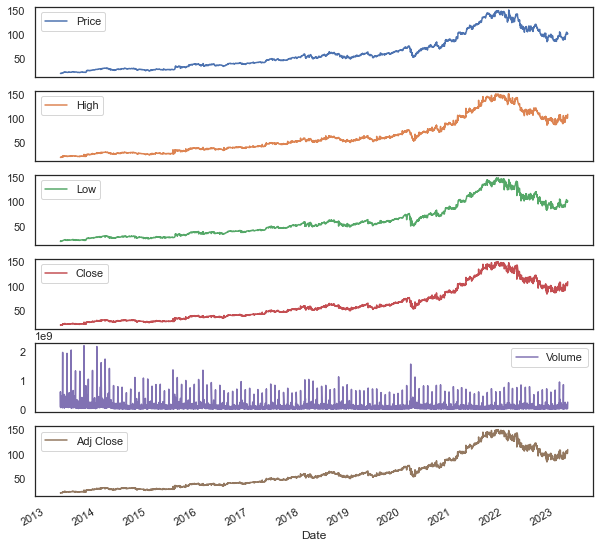

In [27]:
#Used time series plots to explore how each variable changes over time. 
# Plot each variable over time
df.plot(subplots=True, figsize=(10,10))
plt.show()

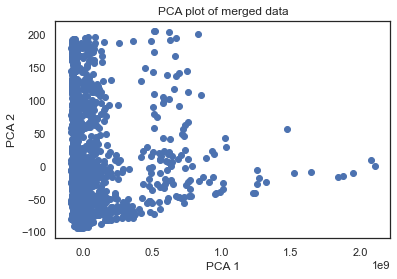

In [28]:
# Extract the columns we want to include in the PCA
X = df[['Price', 'High', 'Low', 'Close', 'Volume', 'Adj Close']].values

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA plot of merged data')
plt.show()


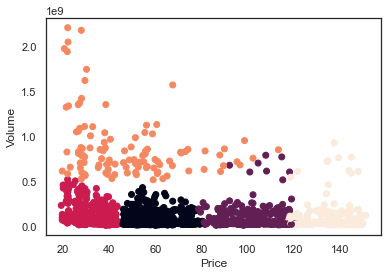

In [29]:
# Select features for clustering
features = ['Price', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Set the number of clusters
k = 5

# Apply KMeans clustering algorithm
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the dataframe
df['Cluster'] = clusters

# Visualize the clusters
plt.scatter(df['Price'], df['Volume'], c=df['Cluster'])
plt.xlabel('Price')
plt.ylabel('Volume')
plt.show()

# Preprocessing

In [30]:
df.head()

Price   High    Low  Close     Volume  Adj Close  Cluster
Date                                                                 
2013-04-15  19.67  19.94  19.44  19.57   98025876      19.57        2
2013-04-16  19.68  19.92  19.62  19.85   69610320      19.85        2
2013-04-17  19.69  19.79  19.47  19.58   81398520      19.58        2
2013-04-18  19.65  19.66  19.05  19.17  132767100      19.17        2
2013-04-19  19.25  20.11  19.18  20.02  231895872      20.02        2

In [31]:
# Drop non-numeric columns and columns with missing values
df = df.select_dtypes(include=[float, int]).dropna()

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Fit the k-means model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# View the cluster assignments
print(df['Cluster'].value_counts())


0    1220
2    1055
1     464
3     302
4     109
Name: Cluster, dtype: int64


In [32]:
df.head()

Price   High    Low  Close     Volume  Adj Close  Cluster
Date                                                                 
2013-04-15  19.67  19.94  19.44  19.57   98025876      19.57        0
2013-04-16  19.68  19.92  19.62  19.85   69610320      19.85        0
2013-04-17  19.69  19.79  19.47  19.58   81398520      19.58        0
2013-04-18  19.65  19.66  19.05  19.17  132767100      19.17        0
2013-04-19  19.25  20.11  19.18  20.02  231895872      20.02        0

# Feature Engineering

In [33]:
# calculate MACD
exp1 = df['Adj Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Adj Close'].ewm(span=26, adjust=False).mean()
macd = exp1 - exp2

# calculate signal line
signal = macd.ewm(span=9, adjust=False).mean()

# add MACD and signal line as new columns
df['MACD'] = macd
df['Signal Line'] = signal

In [34]:
import ta
# Create MACD feature
macd = ta.trend.MACD(df['Adj Close'], window_slow=26, window_fast=12, window_sign=9)
df['MACD'] = macd.macd()

In [35]:
#Create a new column for the difference between the high and low prices for each day
df['Price Range'] = df['High'] - df['Low']

In [36]:
#Create a new column for the percentage change in price from the previous day
df['Price % Change'] = df['Close'].pct_change()

In [37]:
#Create a new column for the moving average of the closing price over the past 5 days
df['MA_5'] = df['Close'].rolling(5).mean()

In [38]:
#Create a new column for the difference between the closing price and the 5-day moving average
df['MA_5_diff'] = df['Close'] - df['MA_5']

In [39]:
#Create a new column for the ratio of the trading volume to the 5-day average volume
df['Volume Ratio'] = df['Volume'] / df['Volume'].rolling(5).mean()

In [40]:
#Create a new column for the difference between the closing price and the 50-day moving average
df['MA_50_diff'] = df['Close'] - df['Close'].rolling(50).mean()

In [41]:
#Create a new column for the exponential moving average of the closing price over the past 10 days
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()

In [42]:
#Create a new column for the rate of change of the closing price over the past 14 days:
df['ROC_14'] = (df['Close'] - df['Close'].shift(14)) / df['Close'].shift(14)

In [43]:
#Create a new column for the average true range over the past 14 days:
TR1 = pd.DataFrame({'high': df['High'], 'low': df['Low'], 'close': df['Close']})
TR2 = pd.DataFrame({'high': df['High'].shift(), 'low': df['Low'].shift(), 'close': df['Close'].shift()})
TR = pd.DataFrame({'TR': np.max([TR1['high'] - TR1['low'], abs(TR1['high'] - TR2['close']), abs(TR1['low'] - TR2['close'])], axis=0)})
df['ATR_14'] = TR['TR'].rolling(14).mean()

In [44]:
df['Open'] = df['Adj Close']

In [45]:
df.head()

Price   High    Low  Close     Volume  Adj Close  Cluster  MACD  \
Date                                                                          
2013-04-15  19.67  19.94  19.44  19.57   98025876      19.57        0   NaN   
2013-04-16  19.68  19.92  19.62  19.85   69610320      19.85        0   NaN   
2013-04-17  19.69  19.79  19.47  19.58   81398520      19.58        0   NaN   
2013-04-18  19.65  19.66  19.05  19.17  132767100      19.17        0   NaN   
2013-04-19  19.25  20.11  19.18  20.02  231895872      20.02        0   NaN   

            Signal Line  Price Range  Price % Change    MA_5  MA_5_diff  \
Date                                                                      
2013-04-15     0.000000         0.50             NaN     NaN        NaN   
2013-04-16     0.004467         0.30        0.014308     NaN        NaN   
2013-04-17     0.007182         0.32       -0.013602     NaN        NaN   
2013-04-18     0.002099         0.61       -0.020940     NaN        NaN   
2013-04-19     0.005952         0.93        0.044340  19.638      0.382   

            Volume Ratio  MA_50_diff     EMA_10  ROC_14  ATR_14   Open  
Date                                                                    
2013-04-15           NaN         NaN  19.570000     NaN     NaN  19.57  
2013-04-16           NaN         NaN  19.620909     NaN     NaN  19.85  
2013-04-17           NaN         NaN  19.613471     NaN     NaN  19.58  
2013-04-18           NaN         NaN  19.532840     NaN     NaN  19.17  
2013-04-19      1.889333         NaN  19.621415     NaN     NaN  20.02

In [46]:
df.fillna(method='ffill', inplace=True)

In [47]:
df.head()

Price   High    Low  Close     Volume  Adj Close  Cluster  MACD  \
Date                                                                          
2013-04-15  19.67  19.94  19.44  19.57   98025876      19.57        0   NaN   
2013-04-16  19.68  19.92  19.62  19.85   69610320      19.85        0   NaN   
2013-04-17  19.69  19.79  19.47  19.58   81398520      19.58        0   NaN   
2013-04-18  19.65  19.66  19.05  19.17  132767100      19.17        0   NaN   
2013-04-19  19.25  20.11  19.18  20.02  231895872      20.02        0   NaN   

            Signal Line  Price Range  Price % Change    MA_5  MA_5_diff  \
Date                                                                      
2013-04-15     0.000000         0.50             NaN     NaN        NaN   
2013-04-16     0.004467         0.30        0.014308     NaN        NaN   
2013-04-17     0.007182         0.32       -0.013602     NaN        NaN   
2013-04-18     0.002099         0.61       -0.020940     NaN        NaN   
2013-04-19     0.005952         0.93        0.044340  19.638      0.382   

            Volume Ratio  MA_50_diff     EMA_10  ROC_14  ATR_14   Open  
Date                                                                    
2013-04-15           NaN         NaN  19.570000     NaN     NaN  19.57  
2013-04-16           NaN         NaN  19.620909     NaN     NaN  19.85  
2013-04-17           NaN         NaN  19.613471     NaN     NaN  19.58  
2013-04-18           NaN         NaN  19.532840     NaN     NaN  19.17  
2013-04-19      1.889333         NaN  19.621415     NaN     NaN  20.02

In [48]:
# Calculate the Price Range
df['Price Range'] = df['High'] - df['Low']

# Calculate the Price % Change
df['Price % Change'] = (df['Close'] - df['Adj Close'].shift(1)) / df['Adj Close'].shift(1) * 100

# Calculate the Moving Average (MA) for 5 days
df['MA_5'] = df['Close'].rolling(window=5).mean()

# Calculate the Moving Average (MA) difference for 5 days
df['MA_5_diff'] = df['Close'] - df['MA_5']

# Calculate the Volume Ratio
df['Volume Ratio'] = df['Volume'] / df['Volume'].rolling(window=5).mean()

# Calculate the Moving Average (MA) difference for 50 days
df['MA_50_diff'] = df['Close'] - df['Close'].rolling(window=50).mean()

# Calculate the Exponential Moving Average (EMA) for 10 days
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()

# Calculate the Rate of Change (ROC) for 14 days
df['ROC_14'] = ((df['Close'] - df['Close'].shift(14)) / df['Close'].shift(14)) * 100

# Calculate the Average True Range (ATR) for 14 days
df['ATR_14'] = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)['volatility_atr']

# Drop any rows with missing values
df.dropna(inplace=True)

# Print the first 5 rows of the new dataset with engineered features
print(df.head())

            Price   High    Low  Close     Volume  Adj Close  Cluster  \
Date                                                                    
2013-06-24  21.82  21.93  21.60  21.77  120555324      21.77        0   
2013-06-25  21.95  22.01  21.63  21.68  102025872      21.68        0   
2013-06-26  21.87  21.97  21.79  21.86   73182744      21.86        0   
2013-06-27  21.99  22.14  21.94  21.95   76982940      21.95        0   
2013-06-28  21.89  22.07  21.88  22.03   93878028      22.03        0   

                MACD  Signal Line  Price Range  ...  momentum_ppo  \
Date                                            ...                 
2013-06-24  0.143200     0.187434         0.33  ...      0.653472   
2013-06-25  0.102522     0.170452         0.38  ...      0.468212   
2013-06-26  0.083842     0.153130         0.18  ...      0.382949   
2013-06-27  0.075431     0.137590         0.20  ...      0.344465   
2013-06-28  0.074363     0.124945         0.19  ...      0.339437   

    

# Visualize the data

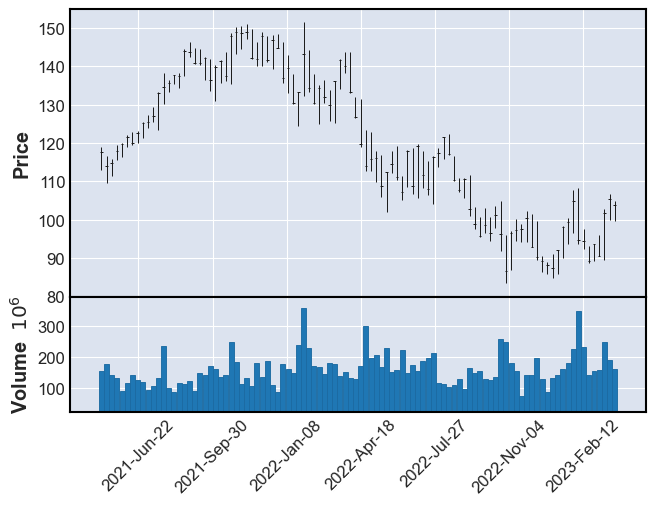

In [49]:
import mplfinance as mpf
# Plot candlestick chart for the last 100 days of data
mpf.plot(df.iloc[-100:], type='candle', volume=True, show_nontrading=True)

# Statistical analysis 

             Price         High          Low        Close        Volume  \
count  3101.000000  3101.000000  3101.000000  3101.000000  3.101000e+03   
mean     62.130339    63.087004    61.225647    62.202889  9.859179e+07   
std      34.344308    34.954505    33.739994    34.354840  1.833344e+08   
min      19.670000    20.110000    19.050000    20.020000  9.312000e+06   
25%      35.530000    36.050000    35.060000    35.450000  2.845800e+07   
50%      53.780000    54.580000    52.730000    53.800000  3.850800e+07   
75%      80.450000    82.220000    78.750000    80.810000  8.070000e+07   
max     151.250000   151.550000   148.900000   149.840000  2.206771e+09   

         Adj Close      Cluster         MACD  Signal Line  Price Range  ...  \
count  3101.000000  3101.000000  3101.000000  3101.000000  3101.000000  ...   
mean     62.202889     1.262818     0.175434     0.179396     1.861358  ...   
std      34.354840     1.164087     3.110873     2.912730     2.378989  ...   
min     

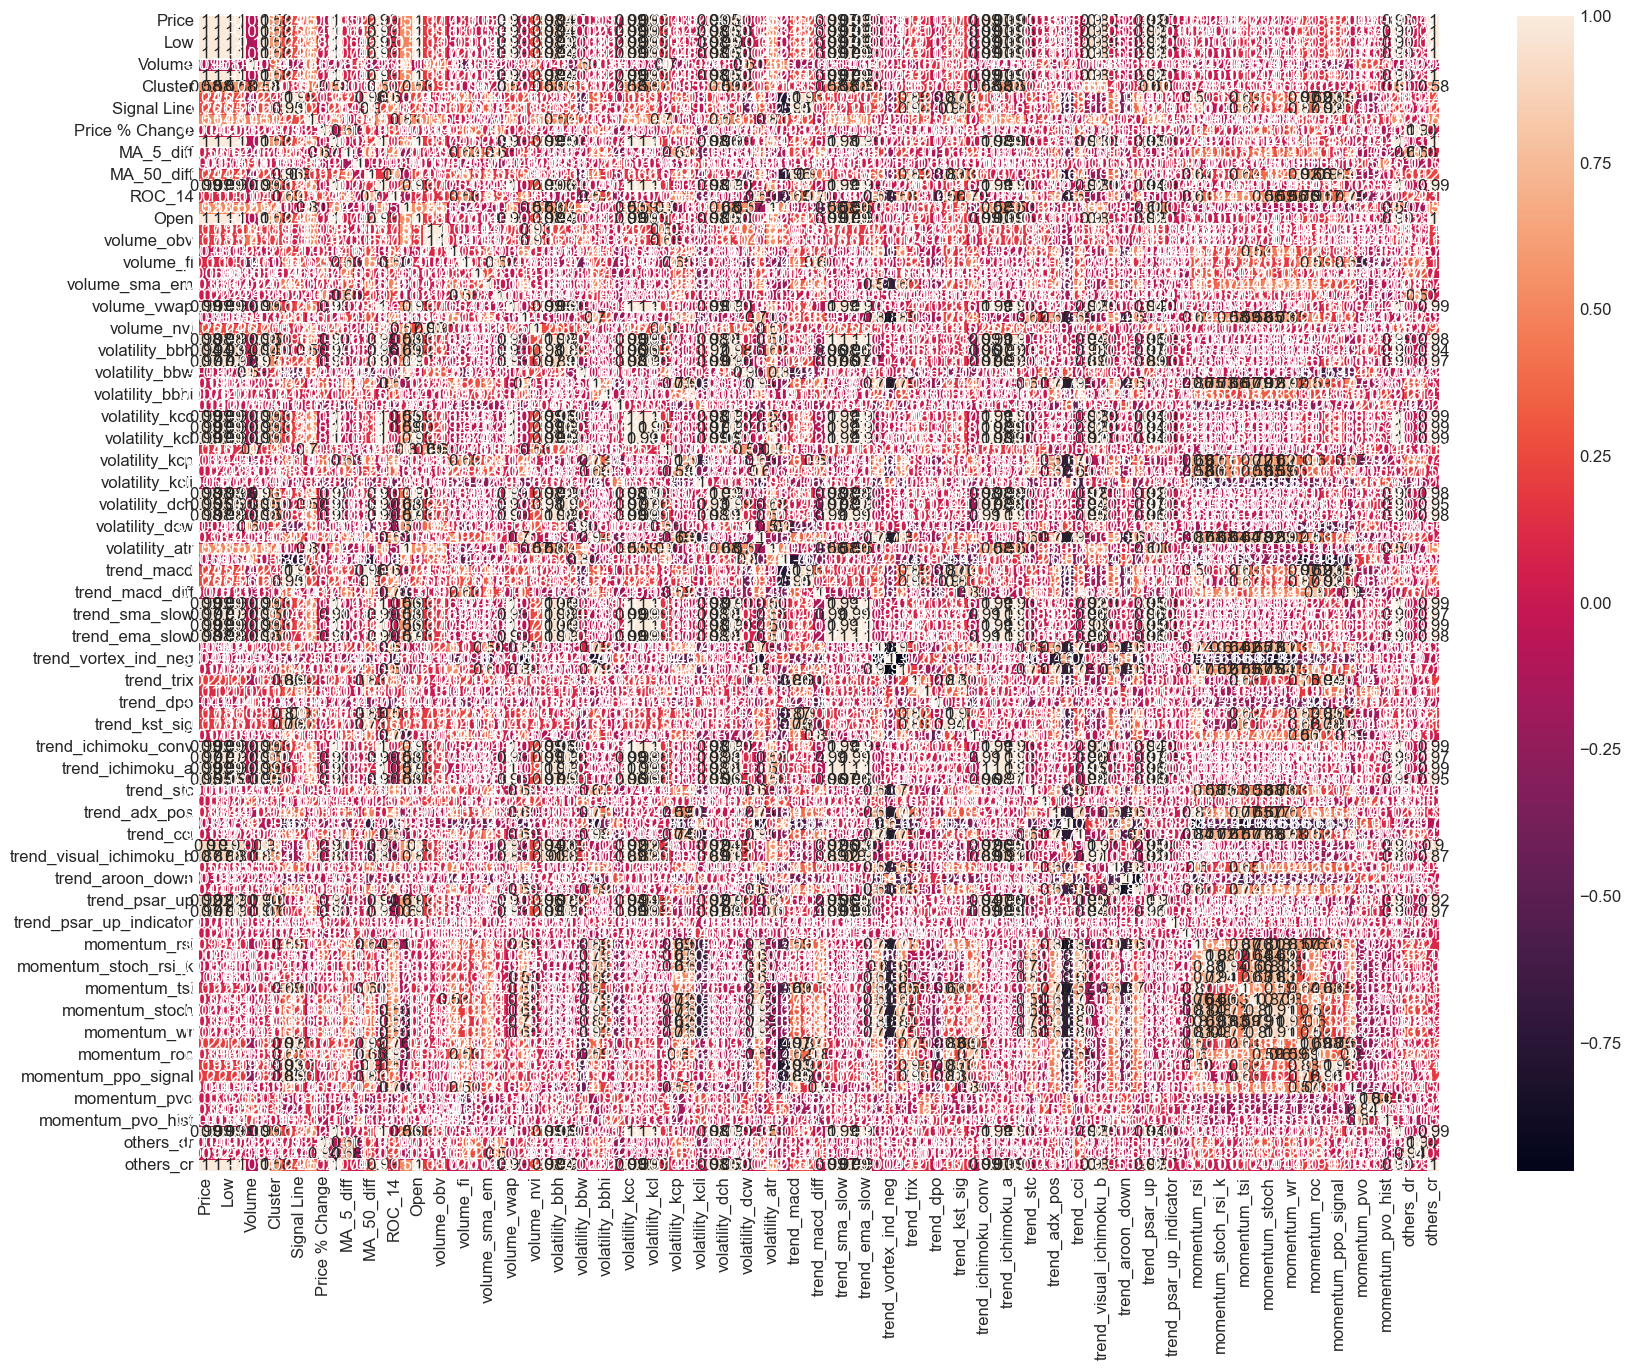

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     567.2
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          1.25e-210
Time:                        16:20:44   Log-Likelihood:                -14883.
No. Observations:                3101   AIC:                         2.977e+04
Df Residuals:                    3098   BIC:                         2.979e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           58.2886      1.905     30.604   

In [50]:
print(df.describe())

corr_matrix = df.corr()
print(corr_matrix)

corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()


X = df[['Price Range', 'Volume Ratio']]
Y = df['Close']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


group1 = df[df['Cluster'] == 0]['Close']
group2 = df[df['Cluster'] == 1]['Close']

t_stat, p_val = stats.ttest_ind(group1, group2)

print('t-statistic:', t_stat)
print('p-value:', p_val)

# Check for stationarity using Augmented Dickey-Fuller test
adf_result = adfuller(df['Close'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

In [51]:
# Trying out for the best model that works well

# Prepare data for machine learning models
X = df[['Price Range', 'Volume Ratio', 'MA_5_diff', 'ROC_14']]
Y = df['Close']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Evaluate linear regression model
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(Y_test, lr_pred)
print('Linear Regression Mean Squared Error:', lr_mse)

# Train random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Evaluate random
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(Y_test, rf_pred)
print('Random Forest Regression Mean Squared Error:', rf_mse)

Linear Regression Mean Squared Error: 839.0348295614693
Random Forest Regression Mean Squared Error: 516.0167615422233


In [52]:
# Prepare data for machine learning models
X = df[['Price Range', 'Volume Ratio', 'MA_5_diff', 'ROC_14']]
Y = df['Close']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train Support Vector Regression model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_model.fit(X_train, Y_train)

# Evaluate Support Vector Regression model
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(Y_test, svr_pred)
print('Support Vector Regression Mean Squared Error:', svr_mse)


Support Vector Regression Mean Squared Error: 539.6703491095702


In [53]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso

# Train Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, Y_train)

# Evaluate Gradient Boosting Regression model
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(Y_test, gb_pred)
print('Gradient Boosting Regression Mean Squared Error:', gb_mse)

# Train XGBoost Regression model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, Y_train)

# Evaluate XGBoost Regression model
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(Y_test, xgb_pred)
print('XGBoost Regression Mean Squared Error:', xgb_mse)

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, Y_train)

# Evaluate Ridge Regression model
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(Y_test, ridge_pred)
print('Ridge Regression Mean Squared Error:', ridge_mse)

# Train Lasso Regression model
lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train, Y_train)

# Evaluate Lasso Regression model
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(Y_test, lasso_pred)
print('Lasso Regression Mean Squared Error:', lasso_mse)


Gradient Boosting Regression Mean Squared Error: 495.6947210059632
XGBoost Regression Mean Squared Error: 566.8649622105821
Ridge Regression Mean Squared Error: 839.0024421298399
Lasso Regression Mean Squared Error: 839.6571415455996


# Building Predictive models

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data for machine learning model
X = df[['Price Range', 'Volume Ratio', 'MA_5_diff', 'ROC_14']]
Y = df['Close']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gb_model.fit(X_train, Y_train)

# Evaluate Gradient Boosting Regression model
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(Y_test, gb_pred)
print('Gradient Boosting Regression Mean Squared Error:', gb_mse)

Gradient Boosting Regression Mean Squared Error: 509.7607412182218


In [55]:
# Make predictions on new data
new_data = pd.DataFrame({'Price Range': [10, 15], 'Volume Ratio': [0.8, 0.9], 'MA_5_diff': [-2, 3], 'ROC_14': [1.5, 2.0]})
predictions = gb_model.predict(new_data)
print('Predictions:', predictions)

Predictions: [136.20797848 133.71731522]


In [56]:
# Analyzing performance on a larger test set

# Prepare data for machine learning model
X = df[['Price Range', 'Volume Ratio', 'MA_5_diff', 'ROC_14']]
Y = df['Close']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train gradient boosting regression model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, Y_train)

# Evaluate gradient boosting regression model on larger test set
gbr_pred = gbr_model.predict(X_test)
gbr_mse = mean_squared_error(Y_test, gbr_pred)
print('Gradient Boosting Regression Mean Squared Error:', gbr_mse)

Gradient Boosting Regression Mean Squared Error: 457.1086866939339


In [57]:
#Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Prepare data for machine learning model
X = df[['Price Range', 'Volume Ratio', 'MA_5_diff', 'ROC_14']]
Y = df['Close']

# Train gradient boosting regression model with cross-validation
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
scores = cross_val_score(gb_model, X, Y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Evaluate gradient boosting regression model with cross-validation
print('Cross-Validation Mean RMSE:', rmse_scores.mean())
print('Cross-Validation Standard Deviation:', rmse_scores.std())

Cross-Validation Mean RMSE: 28.514287451973892
Cross-Validation Standard Deviation: 15.20657468008561


In [58]:
#Hyperparameter Tuning

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}

# Create gradient boosting regression model
gb_model = GradientBoostingRegressor()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [59]:
#Build and evaluate the final model

# Prepare data for machine learning models
X = df[['Price Range', 'Volume Ratio', 'MA_5_diff', 'ROC_14']]
Y = df['Close']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Set up hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Create Gradient Boosting Regressor object
gb_reg = GradientBoostingRegressor(random_state=42)

# Perform GridSearchCV to find best hyperparameters
gb_grid = GridSearchCV(gb_reg, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
gb_grid.fit(X_train, Y_train)

# Print best hyperparameters
print("Best hyperparameters:", gb_grid.best_params_)

# Build final model with best hyperparameters
final_gb = GradientBoostingRegressor(random_state=42, **gb_grid.best_params_)
final_gb.fit(X_train, Y_train)

# Evaluate final model
gb_pred = final_gb.predict(X_test)
gb_mse = mean_squared_error(Y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)
print("Final model RMSE:", gb_rmse)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Final model RMSE: 22.264202680670223
